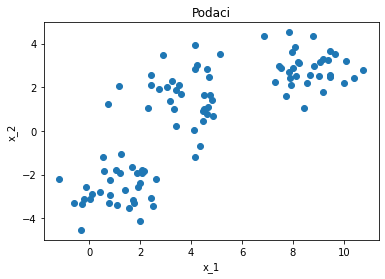

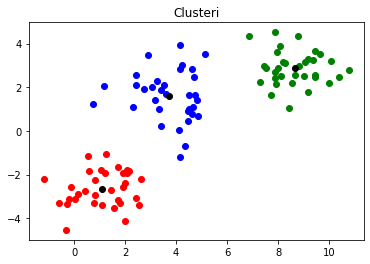

In [56]:
#Zadatak 1

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

X=generate_data(100,1)
plt.figure(1)
plt.title("Podaci")
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x_1')
plt.ylabel('x_2')

model = KMeans(n_clusters = 3, n_init = 20, max_iter = 10)

indexes=model.fit_predict(X) #indeksi kojem clusteru pripada svaki element

centers=model.cluster_centers_ #centri clustera

plt.figure(2)
plt.title("Clusteri")
for i in range(len(X)):
  if(indexes[i] == 0):
    plt.scatter(X[i,0], X[i,1], color='r')
  if(indexes[i] == 1):
    plt.scatter(X[i,0], X[i,1], color='g')
  if(indexes[i] == 2):
    plt.scatter(X[i,0], X[i,1], color='b')
plt.scatter(centers[:,0], centers[:,1], color='black')
plt.show()

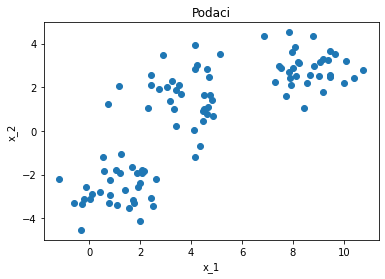

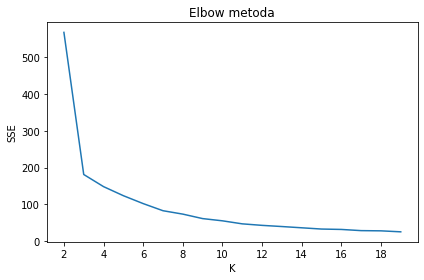

In [58]:
#Zadatak 2

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.ticker import MaxNLocator

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

X=generate_data(100,1)
plt.figure(1)
plt.title("Podaci")
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x_1')
plt.ylabel('x_2')

# Elbow metoda
SSE_kmeans = []        
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # spremi sumu kvadratnih udaljenosti uzoraka do najblizeg centra (SSE)
    SSE_kmeans.append(kmeans.inertia_) 

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(range(2, 20), SSE_kmeans)
plt.title("Elbow metoda")
plt.xlabel("K")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

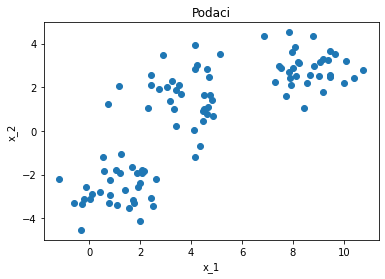

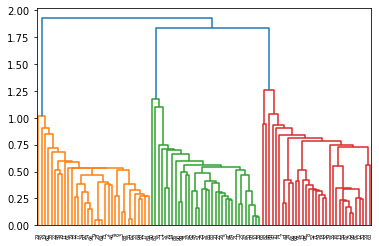

In [66]:
#Zadatak 3

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.ticker import MaxNLocator

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

X=generate_data(100,1)
plt.figure(1)
plt.title("Podaci")
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

Z = linkage(X, 'single')
dn = dendrogram(Z)
plt.show()


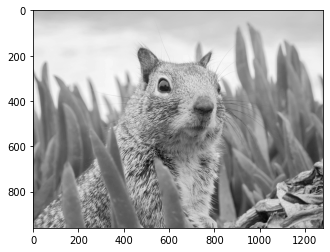

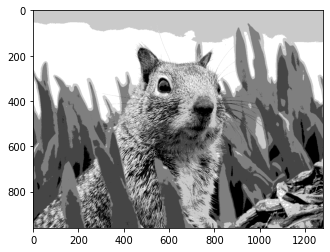

In [69]:
#Zadatak 4

import scipy as sp
from sklearn import cluster, datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

face = mpimg.imread('example_grayscale.png') 
    
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5,n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face,  cmap='gray')

plt.figure(2)
plt.imshow(face_compressed,  cmap='gray')


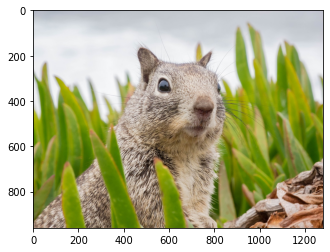

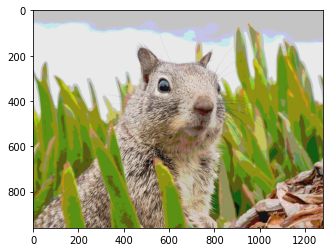

In [70]:
#Zadatak 5

import scipy as sp
from sklearn import cluster, datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

face = mpimg.imread('example.png') 
    
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5,n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face,  cmap='gray')

plt.figure(2)
plt.imshow(face_compressed,  cmap='gray')


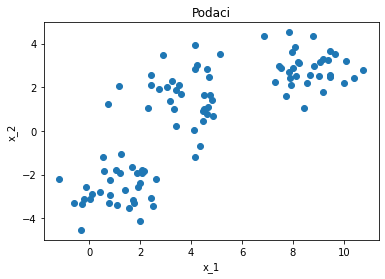

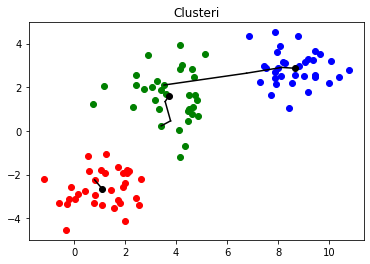

In [194]:
#Zadatak 1

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math
import random

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

n_samples=100
X=generate_data(n_samples,1)
plt.figure(1)
plt.title("Podaci")
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x_1')
plt.ylabel('x_2')

K=3 #broj centara
centers=np.asarray(random.choices(X,k=K)) #nasumično odaberi 3 točke da budu centri
distances=[]
n_iters=10
last_centers=np.empty_like(centers) #za pamćenje prošlih centara

plt.figure(2)
plt.title("Clusteri")

for j in range(n_iters):
  i=0
  b=np.zeros((n_samples,K)) #prazan skup za b
  for point in X: #određivanje kojem clusteru svaka točka x pripada
    distances.append(math.dist(point,centers[0]))
    distances.append(math.dist(point,centers[1]))
    distances.append(math.dist(point,centers[2]))
    b[i][np.argmin(distances)]=1
    i=i+1
    distances=[]
  for k in range(0,K): #osvježavanje vrijednosti za svaki cluster 
    num=0
    den=0
    for i in range(n_samples):
      num=num + b[i,k] * X[i] #brojnik
      den=den + b[i,k] #nazivnik
    last_centers[k]=centers[k]
    centers[k]=num/den 
  for i in range(3): #spajanje točaka prošlog i trenutnog centra, za prikaz putanje kroz sve iteracije
    x_values=[last_centers[i,0], centers[i,0]]
    y_values=[last_centers[i,1], centers[i,1]]
    plt.plot(x_values,y_values, color="black")

for i in range(len(X)):
  if(np.argmax(b[i]) == 0):
    plt.scatter(X[i,0], X[i,1], color='r')
  if(np.argmax(b[i]) == 1):
    plt.scatter(X[i,0], X[i,1], color='g')
  if(np.argmax(b[i]) == 2):
    plt.scatter(X[i,0], X[i,1], color='b')
plt.scatter(centers[:,0], centers[:,1], color='black')
plt.show()